# Gradient Descent

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.


## Objectives

In this lab you will: 


- Implement gradient descent from scratch to minimize OLS


## Use gradient descent to minimize OLS

To practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to as Ordinary Least Squares (OLS) regression. You'll compare two simplistic models and use gradient descent to improve upon these initial models.


## Load the dataset

- Import the file `'movie_data.xlsx'` using Pandas 
- Print the first five rows of the data 

> You can use the `read_excel()` function to import an Excel file. 

In [1]:
# Import the required libraries
import pandas as pd

# Load the dataset from the 'movie_data.xlsx' file
df = pd.read_excel('movie_data.xlsx')
df

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42
5,225000000,38362475,47 Ronin
6,92000000,67349198,A Good Day to Die Hard
7,12000000,15323921,About Time
8,13000000,18007317,Admission
9,130000000,60522097,After Earth


## Two simplistic models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested and need to be compared.  
The two models are:  

$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  


Here's a graph of the two models along with the actual data:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

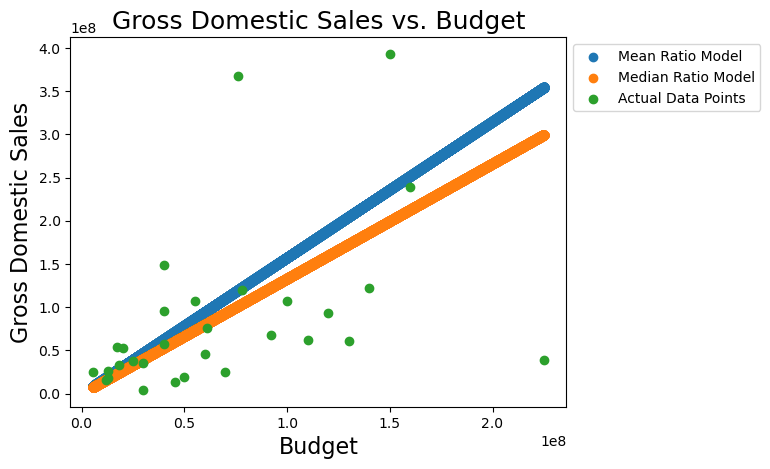

In [2]:
x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') # Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') # Model 2
plt.scatter(df['budget'], df['domgross'], label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Error/Loss functions

To compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally, this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function `rss()` which calculates the residual sum of squares for a simplistic model: 

$\text{domgross} = m \cdot \text{budget}$ 

In [3]:
def rss(m, X=df['budget'], y=df['domgross']):
    # Calculate the predicted domgross using the simplistic model: domgross = m * budget
    domgross_pred = m * X

    # Calculate the residuals (difference between the predicted values and the actual values)
    residuals = domgross_pred - y

    # Calculate the squared residuals and sum them up to get the RSS
    rss = (residuals**2).sum()

    return rss

## Find the RSS for the two models
Which of the two models is better?

In [4]:
# Values of m for the two models
m_model1 = 1.575
m_model2 = 1.331

# Calculate the RSS for the two models
rss_model1 = rss(m_model1)
rss_model2 = rss(m_model2)

# Display the RSS for the two models
print(f"RSS for Mean Ratio Model (Model 1): {rss_model1}")
print(f"RSS for Median Ratio Model (Model 2): {rss_model2}")

RSS for Mean Ratio Model (Model 1): 2.7614512142376128e+17
RSS for Median Ratio Model (Model 2): 2.3547212057814554e+17


In [5]:
# Compare the two models
if rss_model1 < rss_model2:
    print("Mean Ratio Model (Model 1) is better.")
elif rss_model1 > rss_model2:
    print("Median Ratio Model (Model 2) is better.")
else:
    print("Both models have the same RSS.")

Median Ratio Model (Model 2) is better.


## Gradient descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less than 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference 
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

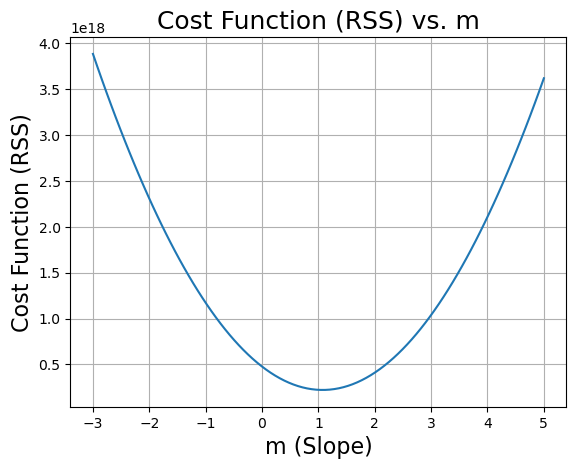

In [7]:
# Range of m values from -3 to 5
m_values = np.linspace(-3, 5, 100)

# Calculate the RSS for each m value
rss_values = [rss(m) for m in m_values]

# Plot the cost function
plt.plot(m_values, rss_values)
plt.title('Cost Function (RSS) vs. m', fontsize=18)
plt.xlabel('m (Slope)', fontsize=16)
plt.ylabel('Cost Function (RSS)', fontsize=16)
plt.grid(True)
plt.show()


As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [12]:
# Gradient descent implementation
def gradient_descent(starting_point, alpha, precision, max_iters):
    cur_x = starting_point
    previous_step_size = 1
    iters = 0
    
    while previous_step_size > precision and iters < max_iters:
        x_survey_region = np.linspace(start=cur_x - previous_step_size, stop=cur_x + previous_step_size, num=101)
        rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
        gradient = np.gradient(rss_survey_region)[50]
        
        # Take a step in the direction of the negative gradient
        cur_x -= alpha * gradient
        
        # Update the iteration number
        iters += 1
        
        # Calculate the change in x for convergence check
        previous_step_size = alpha * np.abs(gradient)
    
    return cur_x

# Set initial parameters for gradient descent
starting_point = 1.0  # Starting point (initial m value)
alpha = 0.0001  # Step size (reduced from 0.01)
precision = 0.0000001  # Precision value
max_iters = 10000  # Maximum number of iterations

# Perform gradient descent to find the optimal m value
optimal_m = gradient_descent(starting_point, alpha, precision, max_iters)

# Output the optimal m value
print("The local minimum occurs at", optimal_m)


The local minimum occurs at nan


## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

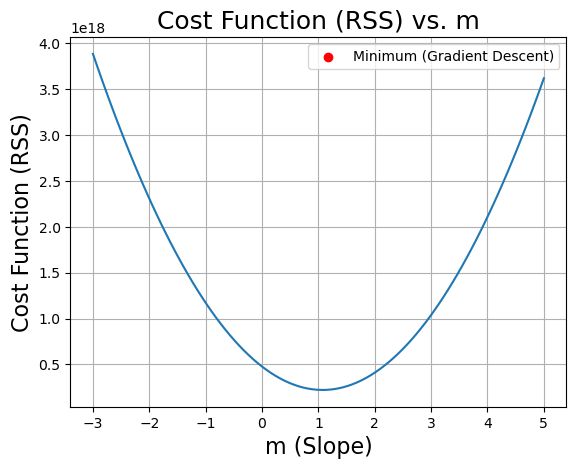

In [18]:
# Range of m values from -3 to 5
m_values = np.linspace(-3, 5, 100)

# Calculate the RSS for each m value
rss_values = [rss(m) for m in m_values]

# Plot the cost function
plt.plot(m_values, rss_values)
plt.title('Cost Function (RSS) vs. m', fontsize=18)
plt.xlabel('m (Slope)', fontsize=16)
plt.ylabel('Cost Function (RSS)', fontsize=16)
plt.grid(True)

# Plot the minimum point found by gradient descent
plt.scatter(optimal_m, rss(optimal_m), color='red', label='Minimum (Gradient Descent)', zorder=5)

plt.legend()
plt.show()



## Summary 

In this lab, you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!